In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
with open('NK_breaking_association_matrices.txt', 'rb') as f:
    NK_breaking_association = pickle.load(f)
with open('NK_complex_adaptation_matrices.txt', 'rb') as f:
    NK_complex_adaptation = pickle.load(f)
with open('NK_eliminating_hitchhiking_matrices.txt', 'rb') as f:
    NK_eliminating_hitchhiking = pickle.load(f)
with open('NK_limiting_pM_matrices.txt', 'rb') as f:
    NK_limiting_pM = pickle.load(f)

In [3]:
with open('aspergillus_breaking_association_matrices.txt', 'rb') as f:
    aspergillus_breaking_association = pickle.load(f)
with open('aspergillus_complex_adaptation_matrices.txt', 'rb') as f:
    aspergillus_complex_adaptation = pickle.load(f)
with open('aspergillus_eliminating_hitchhiking_matrices.txt', 'rb') as f:
    aspergillus_eliminating_hitchhiking = pickle.load(f)
with open('aspergillus_limiting_pM_matrices.txt', 'rb') as f:
    aspergillus_limiting_pM = pickle.load(f)

In [5]:
def convert_logspace(val, true_axis, range_axis):
    possibilities = np.logspace(np.log10(true_axis[0]),np.log10(true_axis[-1]), 10000)
    closest_possibility = np.searchsorted(possibilities, val)
    converted_value = ((closest_possibility - 0) / (10000-0))*len(range_axis)
    return(converted_value)

In [6]:
noise_labels = ['$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','0.95']
switching_rates = np.logspace(-6, np.log10(0.95),100)
range_axis = np.arange(99)
which_ticks = [convert_logspace(val, switching_rates, range_axis) for val in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.95]]
simulation_names = ['Complex adaptation', 
                    'Eliminating hitchhiking',
                    'Breaking association',
                    'Limiting $p_M$']

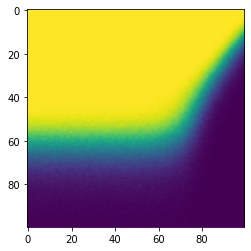

In [7]:
plt.imshow(NK_complex_adaptation[499][0])

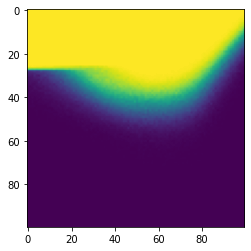

In [8]:
plt.imshow(NK_eliminating_hitchhiking[499][0])

In [7]:
def calculate_pval_z(x1,x2,n1,n2):
    p1 = x1/n1
    p2 = x2/n2
    pp = (x1+x2)/(n1+n2)
    qp = 1-pp
    
    Z = (p1-p2)/np.sqrt(pp*qp*((1/n1)+(1/n2)))
    
    return(scipy.stats.norm.cdf(-np.abs(Z)))

In [10]:
NK_complex_adaptation[499][0][50,50]

943.0

In [11]:
NK_eliminating_hitchhiking[499][0][50,50]

171.0

In [8]:
def calculate_pval_matrix(vect1, vect2):
    
    pval_matrix = np.zeros((100,100))

    for i in range(100):

        for j in range(100):

            pval_matrix[i,j] = np.log10(calculate_pval_z(vect1[i,j],
                                                         vect2[i,j],
                                                          1000,1000))

    pval_matrix = np.nan_to_num(pval_matrix, 0)
    pval_matrix = -np.clip(pval_matrix,-500,0)
    
    return(pval_matrix)

In [9]:
pval_hitchhiking = []
pval_association = []
pval_pM = []

for i in range(3):
    print(i)
    pval_hitchhiking.append(calculate_pval_matrix(NK_complex_adaptation[499][i], NK_eliminating_hitchhiking[499][i]))
    pval_association.append(calculate_pval_matrix(NK_complex_adaptation[499][i], NK_breaking_association[499][i]))
    pval_pM.append(calculate_pval_matrix(NK_complex_adaptation[499][i], NK_limiting_pM[499][i]))
    
pval_hitchhiking.append(calculate_pval_matrix(aspergillus_complex_adaptation[499], aspergillus_eliminating_hitchhiking[499]))
pval_association.append(calculate_pval_matrix(aspergillus_complex_adaptation[499], aspergillus_breaking_association[499]))
pval_pM.append(calculate_pval_matrix(aspergillus_complex_adaptation[499], aspergillus_limiting_pM[499]))

0


<ipython-input-7-076260ca9a6a>:7: RuntimeWarning: invalid value encountered in double_scalars
  Z = (p1-p2)/np.sqrt(pp*qp*((1/n1)+(1/n2)))
<ipython-input-8-c9a808e7bf36>:9: RuntimeWarning: divide by zero encountered in log10
  pval_matrix[i,j] = np.log10(calculate_pval_z(vect1[i,j],


1
2


In [10]:
comparison_names = ['Eliminating \nhitchhiking', 'Breaking \nassociation', 'Limiting $p_M$']
simulation_names = ['NK landscape, k=1', 'NK landscape, k=3', 'NK landscape, k=5', '$\it{A. niger}$ landscape']

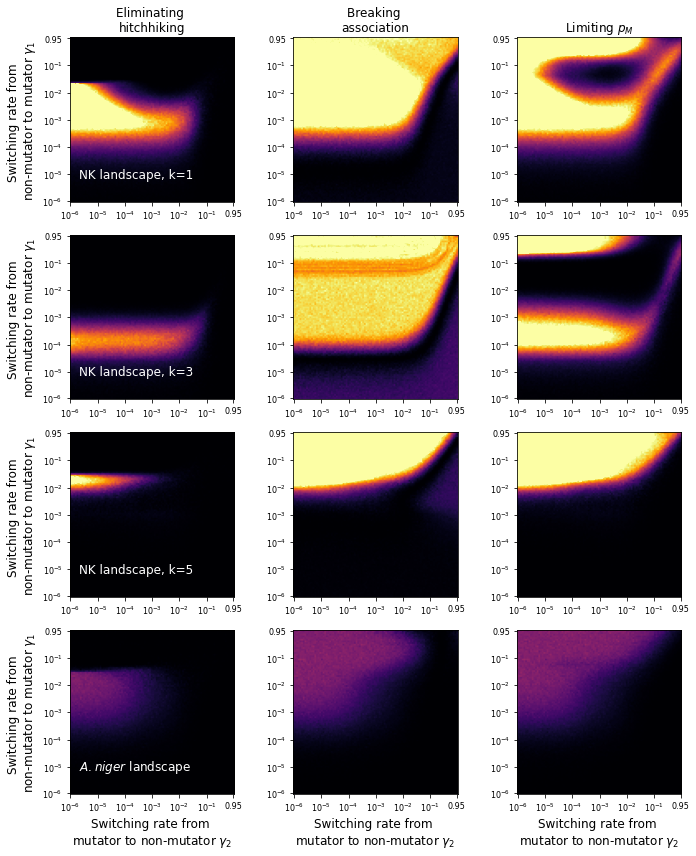

In [12]:
fig, ax = plt.subplots(4,3,figsize = (10,12))

for n in range(4):
    
    ax[n,0].imshow(pval_hitchhiking[n], vmin = 0, vmax = 300, cmap = 'inferno')
    ax[n,1].imshow(pval_association[n], vmin = 0, vmax = 300, cmap = 'inferno')
    ax[n,2].imshow(pval_pM[n], vmin = 0, vmax = 300, cmap = 'inferno')

    
for i in range(4):
    ax[i,0].set_ylabel('Switching rate from \nnon-mutator to mutator $\gamma_1$', fontsize = 12)
    ax[i,0].text(5,85, simulation_names[i], fontsize = 12, c = 'w')
    for j in range(3):
        ax[3,j].set_xlabel('Switching rate from \nmutator to non-mutator $\gamma_2$', fontsize = 12)
        ax[i,j].set_xticks(which_ticks)
        ax[i,j].set_xticklabels(np.array(noise_labels), fontsize = 8)
        ax[i,j].set_yticks(which_ticks)
        ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 8)
        ax[0,j].set_title(comparison_names[j])
        
plt.tight_layout()
plt.savefig('pvalue_complex_adaptation_JAN20.jpg', dpi = 600, bbox_inches = 'tight')

In [92]:
pval_hitchhiking = np.zeros((100,100))

for i in range(100):
    
    for j in range(100):
        
        pval_hitchhiking[i,j] = np.log10(calculate_pval_z(NK_complex_adaptation[499][0][i,j],
                                                      NK_eliminating_hitchhiking[499][0][i,j],
                                                      1000,1000))
        
pval_hitchhiking = np.nan_to_num(pval_hitchhiking, 0)
pval_hitchhiking = -np.clip(pval_hitchhiking,-500,0)

<ipython-input-18-076260ca9a6a>:7: RuntimeWarning: invalid value encountered in double_scalars
  Z = (p1-p2)/np.sqrt(pp*qp*((1/n1)+(1/n2)))
<ipython-input-92-cba8e6f13696>:7: RuntimeWarning: divide by zero encountered in log10
  pval_hitchhiking[i,j] = np.log10(calculate_pval_z(NK_complex_adaptation[499][0][i,j],


In [49]:
pval_hitchhiking = np.nan_to_num(pval_hitchhiking, 0)

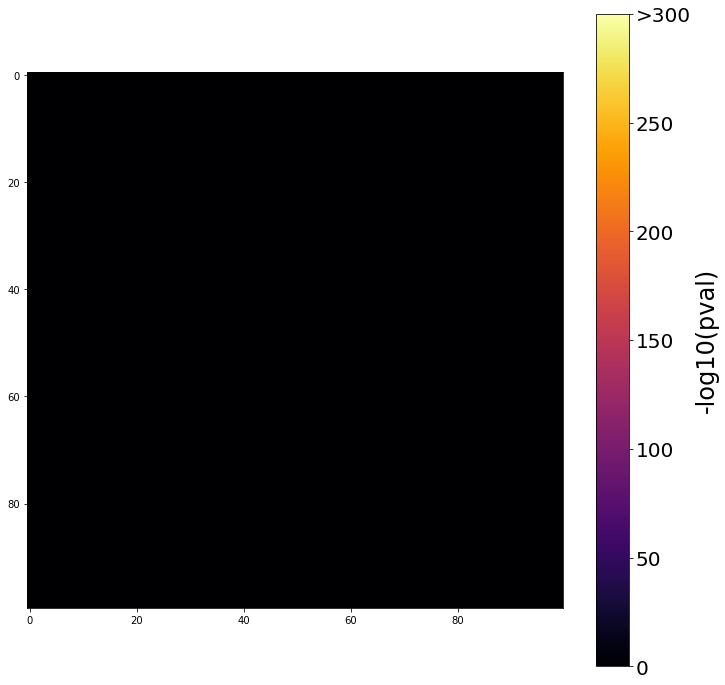

In [120]:
fig, ax = plt.subplots(figsize = (12,12))

im = plt.imshow(-np.clip(pval_hitchhiking[0],-300,0), vmin = 0, vmax = 300, cmap = 'inferno')

cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('-log10(pval)', fontsize = 24)
cbar.set_ticks(list(range(0,301,50)))
cbar.set_ticklabels(list(range(0,300,50))+['>300'])
plt.savefig('cbar_pval_cbar_JAN16.jpg', dpi = 600)

In [36]:
calculate_pval_z(NK_complex_adaptation[499][0][40,0],NK_eliminating_hitchhiking[499][0][40,0], 1000,1000)

0.0

In [50]:
pval_hitchhiking

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.7997112 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.7997112 , -1.29262091],
       [ 0.        ,  0.        ,  0.        , ..., -0.30103   ,
        -0.30103   , -0.30103   ],
       ...,
       [-0.80020907, -2.63869907, -1.90024194, ...,  0.        ,
         0.        ,  0.        ],
       [-2.14995905, -2.39578445, -2.63869907, ...,  0.        ,
         0.        ,  0.        ],
       [-1.90024194, -0.7997112 , -1.38177798, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
NK_breaking_association[499][0]

array([[168., 161., 166., ..., 269., 262., 275.],
       [174., 176., 161., ..., 246., 284., 264.],
       [188., 189., 187., ..., 262., 271., 283.],
       ...,
       [ 46.,  53.,  41., ...,  37.,  54.,  68.],
       [ 44.,  51.,  47., ...,  59.,  54.,  49.],
       [ 53.,  64.,  52., ...,  48.,  49.,  50.]])

In [46]:
sum(np.isinf(np.nan_to_num(pval_hitchhiking)))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

C:\Users\gabril.WISMAIN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2566: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


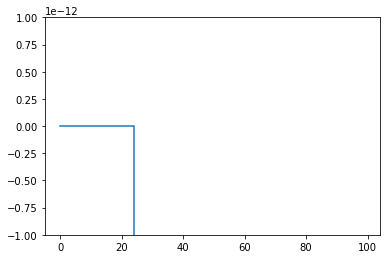

In [53]:
plt.plot(pval_hitchhiking[:,0])

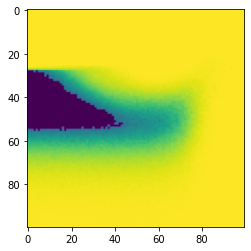

In [55]:
plt.imshow(np.clip(pval_hitchhiking,-500,0))

In [64]:
calculate_pval_matrix(NK_complex_adaptation[499][i], NK_breaking_association[499][i])

<ipython-input-59-c9a808e7bf36>:9: RuntimeWarning: divide by zero encountered in log10
  pval_matrix[i,j] = np.log10(calculate_pval_z(vect1[i,j],


array([[500.        , 500.        , 500.        , ..., 119.40753582,
         88.59609159,  40.91613347],
       [500.        , 500.        , 500.        , ..., 104.31354127,
         63.12499398,  25.17843699],
       [500.        , 500.        , 500.        , ...,  74.62484813,
         48.43919866,  33.43045216],
       ...,
       [  4.06181946,   4.52892843,   2.72283285, ...,   4.52892843,
          3.35570696,   3.35570696],
       [  3.59199055,   5.04439924,   4.2956574 , ...,   4.52892843,
          4.52892843,   2.87936526],
       [  3.82730742,   2.63869907,   4.76172153, ...,   5.22616156,
          3.82730742,   5.68945205]])